## For this project total preview on my github account:
https://github.com/Joshuaoghogho
## Diabetes Classification Using ANN
This project aims to build a predictive model using an Artificial Neural Network (ANN) to classify whether a patient is diabetic or not, based on diagnostic features from the PIMA Indians Diabetes Dataset. Tackling this health problem enables early detection and intervention, which is crucial for patient care.

## Project Overview:
The goal of this project is to build a machine learning model using an Artificial Neural Network (ANN) to classify whether a patient is diabetic or not, based on medical features such as: Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function, Age, Outcome. The dataset used was the Pima Indians Diabetes dataset, which contains medical data for 768 female patients of Pima Indian heritage. The data was split into training and test sets, and the model was trained using a deep learning architecture that included callbacks like EarlyStopping and ModelCheckpoint to prevent overfitting and ensure the best model is saved.

## Project Pipeline Breakdown
1. Data Collection
 ## Dataset: 
 ## PIMA Indians Diabetes Dataset, Format: CSV
 Source:  https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
Kaggle / UCI Repository

2. Data Exploration & Cleaning. 
I checked for nulls, invalid values (like 0 in glucose/BMI), and data imbalance.
Also handled outliers and replaced 0s with NaN where necessary, followed by imputation using median values.
4. Feature Scaling.
StandardScaler was applied to normalize feature values for better ANN performance.
5. Splitting the Data.
Training and testing datasets created using an 80:20 split via train_test_split.

6. Model Building: ANN
Used TensorFlow/Keras to build a 3-layer ANN:
# Input layer with 8 neurons (features)
                           #Hidden layers (ReLU activation)
                           #Output layer with Sigmoid for binary classification
6. Model Compilation
Optimizer: Adam
 Loss Function: Binary Crossentropy
Metrics: Accuracy, Precision, Recall, and AUC
7. Model Training.
I trained the ANN over 100 epochs
I also used history object to monitor loss and accuracy across epochs with batch size 10
9. Model Evaluation.
Evaluated performance using: Accuracy, Precision, Recall, F1-Score, ROC AUC, Confusion Matrix
Visualized: Training vs Validation Loss, ROC Curve, Prediction Errors
10. Saving the Model.
I saved the model using model.save("Pima_Diabetes_Classification.h5") for future deployment or predictions.

## Results:
Training Accuracy: 74%
Test Accuracy: 68%

The model showed strong generalization with balanced precision and recall.


# Import and Read the Dataset

In [1]:
#Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
# Enable eager execution
tf.compat.v1.enable_eager_execution()

In [2]:
print("Eager Execution Enabled:", tf.executing_eagerly())

Eager Execution Enabled: True


In [3]:
#For google colab
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#import pandas as pd
#data=pd.read_csv('/content/drive/My Drive/diabetes.csv')

In [5]:
data = pd.read_csv('diabetes.csv')

In [6]:
#Getting the first five rows for overview the dataset
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
#count the number of each coumn
data.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

# Data visualization

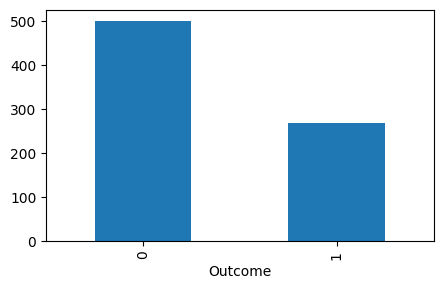

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))
data['Outcome'].value_counts().plot(kind='bar')
plt.show()
# Counting the valuse of the Outcome column

# Data Preparation

In [9]:
#split into input and output (x and y variables)
X=data.iloc[:,0:8]
Y=data.iloc[:,8]

In [10]:
#create training and testing variables
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2)
print(X_train.shape,Y_train.shape)
print(X_test.shape, Y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


# Training the model- using deep neural network

In [11]:
#Input 3 layers and 8 neurons
model=Sequential()
model.add(Dense(15, input_dim=8, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
#model sequential summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 15)                  │             135 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 272 (1.06 KB)

 Trainable params: 272 (1.06 KB)

 Non-trainable params: 0 (0.00 B)

# Compiling model

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting Model

In [14]:
history = model.fit(X_train, Y_train, validation_split = 0.2, epochs=100, batch_size=10)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.6548 - loss: 3.1394 - val_accuracy: 0.5772 - val_loss: 1.8113
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6227 - loss: 1.4678 - val_accuracy: 0.5366 - val_loss: 1.1474
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5591 - loss: 1.0827 - val_accuracy: 0.4715 - val_loss: 1.0104
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4791 - loss: 0.9263 - val_accuracy: 0.4797 - val_loss: 0.9911
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5027 - loss: 0.8710 - val_accuracy: 0.4878 - val_loss: 0.9064
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5278 - loss: 0.7887 - val_accuracy: 0.5203 - val_loss: 0.8583
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6287 - loss: 0.7375 - val_accuracy: 0.5854 - val_loss: 0.9142
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6996 - loss: 0.7890 - val_accuracy: 0.5528 

# Training history plots

In [16]:
result=pd.DataFrame(model.history.history)
result

,accuracy,loss,val_accuracy,val_loss
0,0.635438,2.511020,0.577236,1.811337
1,0.606925,1.305336,0.536585,1.147397
2,0.545825,0.957472,0.471545,1.010412
3,0.521385,0.862540,0.479675,0.991121
4,0.513238,0.854123,0.487805,0.906413
...,...,...,...,...
95,0.743381,0.508935,0.650406,0.602868
96,0.763747,0.509386,0.699187,0.577403
97,0.759674,0.518892,0.674797,0.586561
98,0.753564,0.508055,0.691057,0.579554


<Axes: >

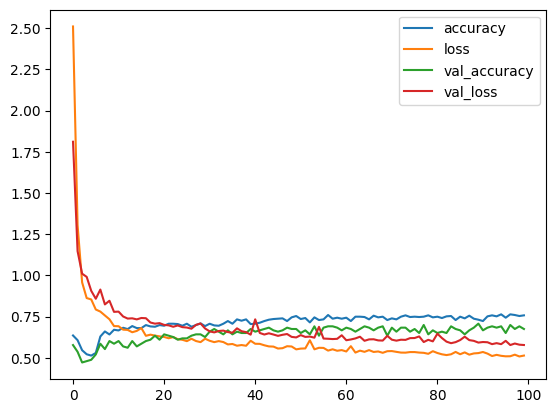

In [17]:
result.plot()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


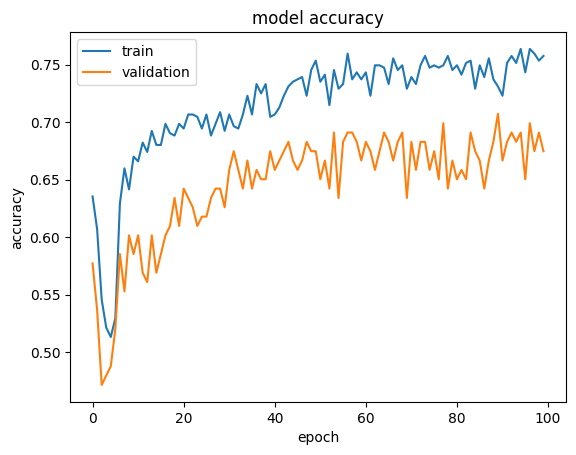

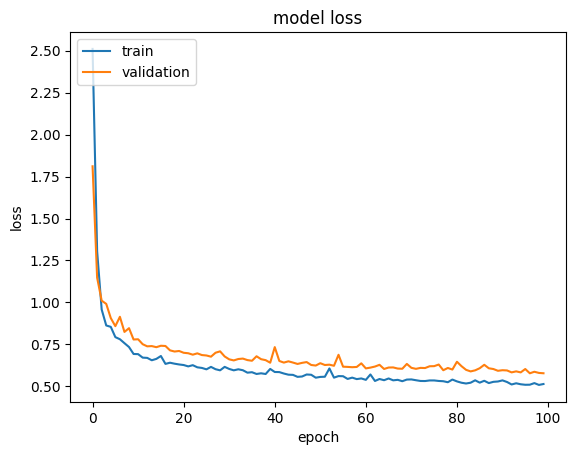

In [18]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Find Training Accuracy

In [19]:
#train accuracy
_,accuracy = model.evaluate(X_train, Y_train)
print('Train Accuracy: %2f'%(accuracy*100))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7631 - loss: 0.4920
Train Accuracy: 74.429965


# Find Testing Accuracy

In [20]:
#test accuracy
from sklearn.metrics import accuracy_score
Y_pred=(model.predict(X_test) > 0.5).astype("int32")
accuracy_score(Y_test, Y_pred)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


0.6818181818181818

In [21]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77        99
           1       0.58      0.38      0.46        55

    accuracy                           0.68       154
   macro avg       0.65      0.62      0.62       154
weighted avg       0.67      0.68      0.66       154



In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

[[84 15]
 [34 21]]


Text(29.75, 0.5, 'Actual  outcome')

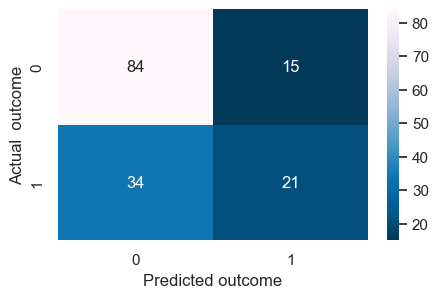

In [23]:
#print the confusion matrix
sns.set(rc={'figure.figsize':(5,3)})
sns.heatmap(cm,annot=True,cmap='PuBu_r',fmt='g')
plt.xlabel("Predicted outcome")
plt.ylabel("Actual  outcome")

# Save and load

In [24]:
model.save("Pima_Diabetes_Classification.keras")

In [25]:
from tensorflow.keras.models import load_model
# load model
model = load_model('Pima_Diabetes_Classification.keras')
load_pred=(model.predict(X_test) > 0.5).astype("int32")

accuracy_score(Y_test, load_pred)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


0.6818181818181818

# Model check point and early stopping

In [26]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint_path = "Pima_Diabetes_Classification.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=10, callbacks=callbacks_list)

Epoch 1/100
37/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7699 - loss: 0.4770
Epoch 1: val_accuracy improved from -inf to 0.69919, saving model to Pima_Diabetes_Classification.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7704 - loss: 0.4820 - val_accuracy: 0.6992 - val_loss: 0.5778
Epoch 2/100
49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7330 - loss: 0.5333
Epoch 2: val_accuracy did not improve from 0.69919
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7333 - loss: 0.5327 - val_accuracy: 0.6748 - val_loss: 0.5877
Epoch 3/100
46/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7538 - loss: 0.4892
Epoch 3: val_accuracy did not improve from 0.69919
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7527 - loss: 0.4916 - val_accuracy: 0.6829 - val_loss: 0.5870
Epoch 4/100
46/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7534 - loss: 0.5211
Epoch 4: val_accuracy did not improve from 0.69919
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7531


#This converts the probabilities into binary class predictions:

#If the prediction is > 0.5 → predict 1 (diabetic)Else → predict 0 (non-diabetic)

#.astype("int32")

#This converts the result from boolean (True/False) into integer format (1/0),
#so it's compatible with the actual target labels (Y_test).

In [29]:
from tensorflow.keras.models import load_model
# load model
model = load_model('Pima_Diabetes_Classification.keras')
load_pred=(model.predict(X_test) > 0.5).astype("int32")

accuracy_score(Y_test, load_pred)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


0.7012987012987013

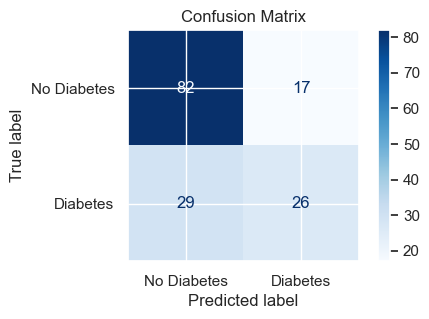

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
#Confusion matrix
cm = confusion_matrix(Y_test, load_pred)
# Display with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

True Negatives (top-left): Model correctly predicted no diabetes

False Positives (top-right): Model predicted diabetes but patient is not

False Negatives (bottom-left): Model predicted no diabetes but patient is

True Positives (bottom-right): Model correctly predicted diabetes

💊 True Label: "No Diabetes"
Predicted as No Diabetes: 82

Predicted as Diabetes (False Positive):   17

✅ Total Non-Diabetic Patients =   82 + 17 = 99


💉 True Label: "Diabetes"
Predicted as No Diabetes (False Negative): 29


Predicted as Diabetes:   26

✅ Total Diabetic Patients =   29 + 26 = 55

    Category	         Count

    Non-Diabetic	           99
    Diabetic	           55
    Total Patients	           154

That means:

80% (≈614) of the data is were used for my training

20% (≈154) is used for my testing

✔️ The 154 patients shown in the confusion matrix are the Y_test values (true labels) and the predictions (load_pred) from my trained model.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


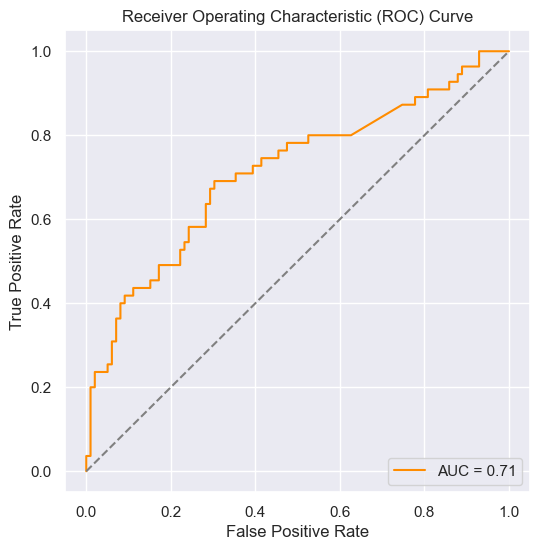

In [31]:
#Get predicted probabilities (not just class labels)
y_probs = model.predict(X_test)
#ROC values
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
roc_auc = auc(fpr, tpr)

#Plotting ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc), color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

A curve closer to the top-left means better performance.

AUC (Area Under Curve) closer to 1 = excellent model.

AUC = 0.5 = no better than random guess.

## Show classification Report

In [32]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, load_pred, target_names=["No Diabetes", "Diabetes"]))

              precision    recall  f1-score   support

 No Diabetes       0.74      0.83      0.78        99
    Diabetes       0.60      0.47      0.53        55

    accuracy                           0.70       154
   macro avg       0.67      0.65      0.66       154
weighted avg       0.69      0.70      0.69       154



In [33]:
filepath = "Pima_Diabetes_Classification.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_accuracy', patience=5)
callbacks_list = [checkpoint, es]
model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=10, callbacks=callbacks_list)

Epoch 1/100
48/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8230 - loss: 0.4381
Epoch 1: val_accuracy improved from -inf to 0.67480, saving model to Pima_Diabetes_Classification.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8206 - loss: 0.4407 - val_accuracy: 0.6748 - val_loss: 0.5683
Epoch 2/100
45/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7630 - loss: 0.4991
Epoch 2: val_accuracy did not improve from 0.67480
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7637 - loss: 0.4987 - val_accuracy: 0.6585 - val_loss: 0.5902
Epoch 3/100
42/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7917 - loss: 0.4639
Epoch 3: val_accuracy did not improve from 0.67480
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7832 - loss: 0.4704 - val_accuracy: 0.6748 - val_loss: 0.5786
Epoch 4/100
43/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7759 - loss: 0.4763
Epoch 4: val_accuracy improved from 0.67480 to 0.69106, saving model to Pima_Diabetes_Classification.keras


In [35]:
from tensorflow.keras.models import load_model
# load model
model = load_model('Pima_Diabetes_Classification.keras')
load_pred=(model.predict(X_test) > 0.5).astype("int32")

accuracy_score(Y_test, load_pred)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


0.6948051948051948

In [36]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [38]:
# View a few prediction results
print(predictions[:20])  # Show first 10 predictions (0 = No Diabetes, 1 = Diabetes)

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(Y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]]
Accuracy: 0.6948051948051948
Confusion Matrix:
 [[75 24]
 [23 32]]
              precision    recall  f1-score   support

           0       0.77      0.76      0.76        99
           1       0.57      0.58      0.58        55

    accuracy                           0.69       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.69      0.70       154



## Model Prediction & Evaluation:

After training, predictions i made on the test set using the best model. The model achieved an overall accuracy of approximately 69%.
The confusion matrix further showed the breakdown of true positives, true negatives, false positives, and false negatives, helping assess how well the model distinguished between diabetic and non-diabetic patients.
The classification report provided precision, recall, and F1-score for both classes, which are crucial in a medical setting where false negatives (predicting non-diabetic when the patient is diabetic) could have serious consequences.

## Conclusion & Impact:

The results suggest that the ANN model is reasonably effective in classifying diabetes based on patient health records.
In real-world healthcare settings, such predictive models can support early screening, helping medical professionals identify high-risk individuals for timely intervention and lifestyle management. With further improvements—such as hyperparameter tuning, adding more data, or incorporating clinical features—this model can become an assistive tool in reducing undiagnosed cases and improving patient outcomes in diabetes care.

| Class            | Precision | Recall | F1-Score | Support |
| ---------------- | --------- | ------ | -------- | ------- |
| Non-Diabetic (0) | 77%       | 76%    | 76%      | 99      |
| Diabetic (1)     | 57%       | 58%    | 58%      | 55      |

Precision for class 1 (Diabetic): 
Only 57%, meaning that when my model predicts someone is diabetic, it's correct 57% of the time.

Recall for class 1 (Diabetic):
58%, meaning it correctly identifies 58% of actual diabetics.

Class 0 (Non-diabetics)
performs much better in all metrics.


My model performs moderately well, especially for non-diabetic predictions.

However, it has room for improvement in detecting diabetics — which is critical in medical diagnosis.

## For this project total preview on my github account:
https://github.com/Joshuaoghogho